In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [6]:
df = pd.read_csv("../resources/train_cleaned.csv")

In [7]:
df

,Unnamed: 0,edad,trabajo,deuda,saldo,vivienda,prestamo,duracion,fecha_contacto,campaign,...,desconocido.1,fijo.1,movil.1,exito,nuevo_cliente,otro,sin_exito,primaria,secundaria/superiores,universitarios
0,0,40.0,1.0,0.0,580.0,1.0,0.0,192.0,1.621116e+09,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0
1,1,47.0,7.0,0.0,3644.0,0.0,0.0,83.0,1.623190e+09,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0
2,2,25.0,8.0,0.0,538.0,1.0,0.0,226.0,1.618870e+09,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,1
3,3,42.0,4.0,0.0,1773.0,0.0,0.0,311.0,1.617919e+09,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,1
4,4,56.0,4.0,0.0,217.0,0.0,1.0,121.0,1.626818e+09,2.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44251,44251,38.0,4.0,0.0,-323.0,1.0,0.0,250.0,1.623190e+09,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0
44252,44252,49.0,9.0,0.0,1982.0,1.0,1.0,73.0,1.629583e+09,15.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,0
44253,44253,51.0,1.0,0.0,794.0,1.0,0.0,747.0,1.627078e+09,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,1,0
44254,44254,29.0,1.0,0.0,98.0,0.0,0.0,170.0,1.628546e+09,2.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,1


In [8]:
X = np.array(df.drop("target", axis = 1))

In [9]:
y = np.array(df["target"])

In [10]:
X.shape, y.shape

((44256, 26), (44256,))

In [13]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

array([[0.00000000e+00, 2.85714286e-01, 9.09090909e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.25963168e-05, 3.76623377e-01, 6.36363636e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.51926336e-05, 9.09090909e-02, 7.27272727e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [9.99954807e-01, 4.28571429e-01, 9.09090909e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.99977404e-01, 1.42857143e-01, 9.09090909e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.81818182e-01, 8.18181818e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (30979, 26), y_train: (30979,)
X_test: (13277, 26),  y_test: (13277,)


In [ ]:

models = [KNeighborsClassifier(3), KNeighborsRegressor(), DecisionTreeRegressor(),
         RandomForestRegressor(), SVR(), AdaBoostRegressor(), GradientBoostingRegressor()]

## KNN

In [ ]:
model = KNeighborsClassifier(n_neighbors = 3)

In [20]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
yhat = model.predict(X_test)

yhat

C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0., 0., 0., ..., 0., 0., 0.])

In [22]:
from sklearn.metrics import accuracy_score

print(f"Accuracy: {accuracy_score(y_test, yhat)}")

Accuracy: 0.8874745801009264


In [24]:
list_accuracy = list()

for k in range(1, 100):
    
    # Modelo
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    
    # Predicciones
    yhat = model.predict(X_test)
    
    # Metricas
    accuracy = accuracy_score(y_test, yhat)
    list_accuracy.append([k, accuracy])
    
    print(f"k: {k}, Acurracy. {accuracy}")

C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 1, Acurracy. 0.8686450252316035


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 2, Acurracy. 0.8901860360021089


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 3, Acurracy. 0.8874745801009264


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 4, Acurracy. 0.8913158092942682


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 5, Acurracy. 0.891240491074791


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 6, Acurracy. 0.8932740830006779


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 7, Acurracy. 0.8928221736838141


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 8, Acurracy. 0.89432853807336


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 9, Acurracy. 0.8941025834149281


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 10, Acurracy. 0.8941779016344054


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 11, Acurracy. 0.8949310838291783


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 12, Acurracy. 0.8947804473902237


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 13, Acurracy. 0.8947051291707464


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 14, Acurracy. 0.8942532198538826


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 15, Acurracy. 0.8944791745123145


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 16, Acurracy. 0.8952323567070875


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 17, Acurracy. 0.895382993146042


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 18, Acurracy. 0.8956842660239512


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 19, Acurracy. 0.8953076749265647


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 20, Acurracy. 0.8953076749265647


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 21, Acurracy. 0.8950817202681328


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 22, Acurracy. 0.8953076749265647


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 23, Acurracy. 0.8950817202681328


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 24, Acurracy. 0.8950817202681328


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 25, Acurracy. 0.895910220682383


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 26, Acurracy. 0.8956842660239512


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 27, Acurracy. 0.895382993146042


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 28, Acurracy. 0.8955336295849966


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 29, Acurracy. 0.8956089478044739


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 30, Acurracy. 0.8962114935602923


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 31, Acurracy. 0.8957595842434285


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 32, Acurracy. 0.8957595842434285


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 33, Acurracy. 0.8957595842434285


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 34, Acurracy. 0.8960608571213377


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 35, Acurracy. 0.8961361753408149


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 36, Acurracy. 0.8957595842434285


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 37, Acurracy. 0.8959855389018604


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 38, Acurracy. 0.8962114935602923


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 39, Acurracy. 0.8965127664382014


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 40, Acurracy. 0.8961361753408149


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 41, Acurracy. 0.8961361753408149


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 42, Acurracy. 0.8959855389018604


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 43, Acurracy. 0.8963621299992468


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 44, Acurracy. 0.8962868117797695


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 45, Acurracy. 0.895910220682383


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 46, Acurracy. 0.8962114935602923


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 47, Acurracy. 0.8960608571213377


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 48, Acurracy. 0.8960608571213377


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 49, Acurracy. 0.8958349024629058


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 50, Acurracy. 0.8956089478044739


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 51, Acurracy. 0.895382993146042


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 52, Acurracy. 0.8956089478044739


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 53, Acurracy. 0.8956089478044739


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 54, Acurracy. 0.8955336295849966


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 55, Acurracy. 0.8954583113655193


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 56, Acurracy. 0.8953076749265647


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 57, Acurracy. 0.8955336295849966


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 58, Acurracy. 0.8954583113655193


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 59, Acurracy. 0.8954583113655193


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 60, Acurracy. 0.8952323567070875


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 61, Acurracy. 0.8955336295849966


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 62, Acurracy. 0.8956089478044739


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 63, Acurracy. 0.8956842660239512


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 64, Acurracy. 0.8956842660239512


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 65, Acurracy. 0.8954583113655193


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 66, Acurracy. 0.8955336295849966


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 67, Acurracy. 0.8956089478044739


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 68, Acurracy. 0.8957595842434285


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 69, Acurracy. 0.8958349024629058


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 70, Acurracy. 0.8956842660239512


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 71, Acurracy. 0.8956089478044739


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 72, Acurracy. 0.8958349024629058


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 73, Acurracy. 0.8957595842434285


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 74, Acurracy. 0.8957595842434285


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 75, Acurracy. 0.8957595842434285


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 76, Acurracy. 0.8956089478044739


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 77, Acurracy. 0.8957595842434285


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 78, Acurracy. 0.895382993146042


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 79, Acurracy. 0.8957595842434285


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 80, Acurracy. 0.895382993146042


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 81, Acurracy. 0.8954583113655193


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 82, Acurracy. 0.8951570384876102


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 83, Acurracy. 0.895382993146042


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 84, Acurracy. 0.8951570384876102


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 85, Acurracy. 0.8956842660239512


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 86, Acurracy. 0.8953076749265647


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 87, Acurracy. 0.8956089478044739


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 88, Acurracy. 0.895382993146042


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 89, Acurracy. 0.8955336295849966


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 90, Acurracy. 0.895382993146042


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 91, Acurracy. 0.8953076749265647


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 92, Acurracy. 0.8953076749265647


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 93, Acurracy. 0.895382993146042


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 94, Acurracy. 0.8953076749265647


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 95, Acurracy. 0.8952323567070875


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 96, Acurracy. 0.8956089478044739


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 97, Acurracy. 0.8957595842434285


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k: 98, Acurracy. 0.8955336295849966
k: 99, Acurracy. 0.8956089478044739


C:\Users\ignci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [27]:
list_accuracy = np.array(list_accuracy)

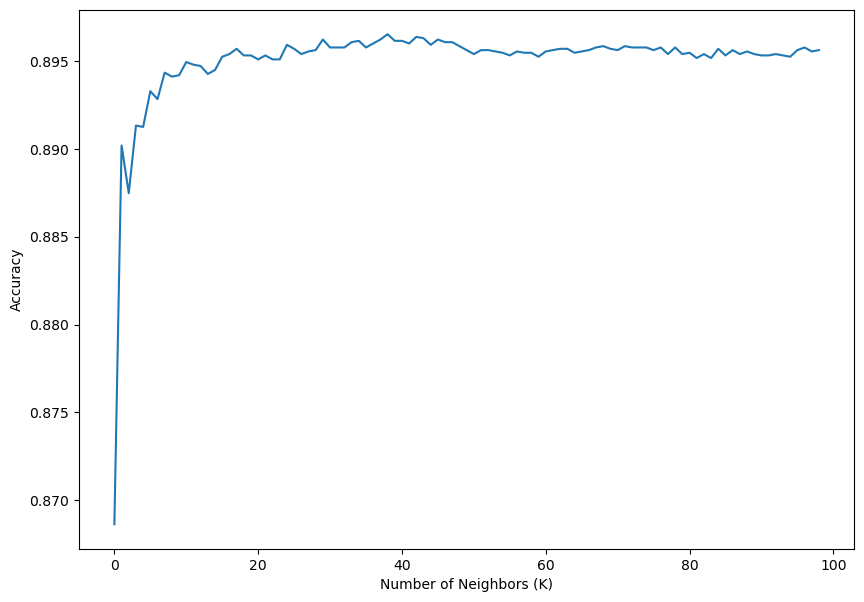

In [28]:
plt.figure(figsize = (10, 7))

plt.plot(list_accuracy[:, 1])

plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors (K)")

plt.show()

In [29]:
mejor_indice = np.argmax(list_accuracy[:, 1])

mejor_indice

38

In [30]:
list_accuracy[mejor_indice, :]

array([39.        ,  0.89651277])

## Radius neighbours

In [40]:
model = RadiusNeighborsClassifier(radius = 0.9)
model.fit(X_train, y_train)

RadiusNeighborsClassifier(radius=0.9)

In [41]:
yhat = model.predict(X_test)

yhat

ValueError: No neighbors found for test samples array([  148,   317,  1100,  1681,  2032,  2469,  2888,  4363,  5930,
        7045,  7223, 10801, 11205, 13095], dtype=int64), you can try using larger radius, giving a label for outliers, or considering removing them from your dataset.

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, yhat)}")

In [ ]:
%%time

list_accuracy = list()
# for radio in np.arange(0.2, 1, 0.001):
for radio in [1/i for i in range(6, 0, -1)]:
    
    # Modelo
    model = RadiusNeighborsClassifier(radius = radio)
    model.fit(X_train, y_train)
    
    # Predicciones
    yhat = model.predict(X_test)
    
    # Metricas
    accuracy = accuracy_score(y_test, yhat)
    list_accuracy.append([radio, accuracy])
    
pd.DataFrame(data = list_accuracy, columns = ["Radio", "Accuracy"])

In [ ]:
list_accuracy = np.array(list_accuracy)

In [ ]:
plt.figure(figsize = (10, 7))

plt.plot(list_accuracy[:, 1])

plt.ylabel("Accuracy")
plt.xlabel("Number of Radius")

plt.xticks(ticks = range(len(list_accuracy[:, 0])), labels = np.round(list_accuracy[:, 0], 2))

plt.show()

## Nearest centroid

In [42]:
model = NearestCentroid(metric = "euclidean")

model.fit(X_train, y_train)

NearestCentroid()

In [43]:
yhat = model.predict(X_test)

yhat

array([1., 1., 1., ..., 0., 0., 0.])

In [44]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.3396123254106929
Accuracy: 0.5590871431799352
Precisión: 0.5563821381371132
Sensibilidad: 0.6401592677797856
F1-score: 0.4799593177121655


In [46]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[6301, 5470],
       [ 384, 1122]], dtype=int64)

In [47]:
print(classification_report(y_test, yhat, digits = 3))

              precision    recall  f1-score   support

         0.0      0.943     0.535     0.683     11771
         1.0      0.170     0.745     0.277      1506

    accuracy                          0.559     13277
   macro avg      0.556     0.640     0.480     13277
weighted avg      0.855     0.559     0.637     13277



In [48]:
model.centroids_

array([[0.50040458, 0.29664035, 0.39032164, 0.01897575, 0.08473117,
        0.57952964, 0.16843725, 0.04512441, 0.4590374 , 0.029744  ,
        0.04236559, 0.00177302, 0.1573009 , 0.310792  , 0.06278848,
        0.62641952, 0.310792  , 0.06278848, 0.62641952, 0.01285808,
        0.842809  , 0.0380614 , 0.10627152, 0.1596454 , 0.53432486,
        0.30602975],
       [0.49958459, 0.31001951, 0.42774938, 0.00950829, 0.08915696,
        0.36348818, 0.09426786, 0.10935755, 0.47195179, 0.01842066,
        0.07820717, 0.00430318, 0.35425156, 0.09915784, 0.07633795,
        0.82450421, 0.09915784, 0.07633795, 0.82450421, 0.18065743,
        0.6460201 , 0.05514806, 0.11817441, 0.11545776, 0.47976093,
        0.40478131]])

In [49]:
model.centroids_

array([[0.50040458, 0.29664035, 0.39032164, 0.01897575, 0.08473117,
        0.57952964, 0.16843725, 0.04512441, 0.4590374 , 0.029744  ,
        0.04236559, 0.00177302, 0.1573009 , 0.310792  , 0.06278848,
        0.62641952, 0.310792  , 0.06278848, 0.62641952, 0.01285808,
        0.842809  , 0.0380614 , 0.10627152, 0.1596454 , 0.53432486,
        0.30602975],
       [0.49958459, 0.31001951, 0.42774938, 0.00950829, 0.08915696,
        0.36348818, 0.09426786, 0.10935755, 0.47195179, 0.01842066,
        0.07820717, 0.00430318, 0.35425156, 0.09915784, 0.07633795,
        0.82450421, 0.09915784, 0.07633795, 0.82450421, 0.18065743,
        0.6460201 , 0.05514806, 0.11817441, 0.11545776, 0.47976093,
        0.40478131]])

In [50]:
model.n_features_in_

26

IndexError: index 2 is out of bounds for axis 0 with size 2

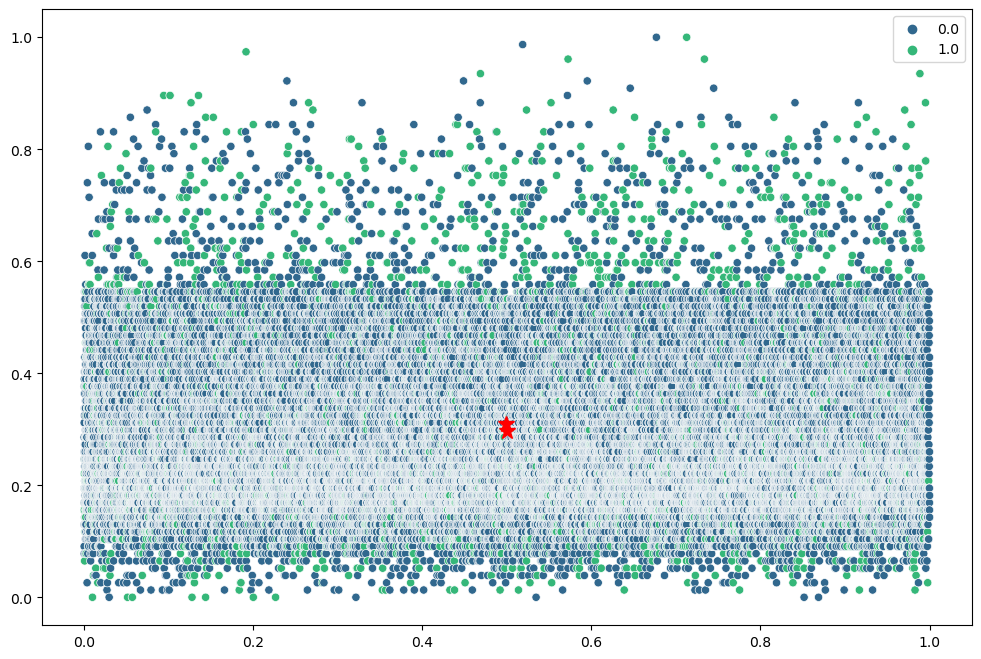

In [51]:
a, b = 0, 1

plt.figure(figsize = (12, 8))

sns.scatterplot(x = X[:, a], y = X[:, b], hue = y, palette = "viridis")

plt.plot(model.centroids_[0][a], model.centroids_[0][b], marker = "*", markersize = 12, color = "red")
plt.plot(model.centroids_[1][a], model.centroids_[1][b], marker = "*", markersize = 12, color = "red")
plt.plot(model.centroids_[2][a], model.centroids_[2][b], marker = "*", markersize = 12, color = "red")

plt.show()

In [ ]:
for i in range(4):
    for j in range(4):
        if i != j:

            plt.figure(figsize = (8, 5))

            sns.scatterplot(x = X[:, i], y = X[:, j], hue = y, palette = "viridis")

            plt.plot(model.centroids_[0][i], model.centroids_[0][j], marker = "*", markersize = 12, color = "red")
            plt.plot(model.centroids_[1][i], model.centroids_[1][j], marker = "*", markersize = 12, color = "red")
            plt.plot(model.centroids_[2][i], model.centroids_[2][j], marker = "*", markersize = 12, color = "red")

            plt.show()

## Naive bayes

In [52]:
model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB()

In [53]:
yhat = model.predict(X_test)

yhat

array([0., 1., 1., ..., 0., 0., 0.])

In [54]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.5009918252252733
Accuracy: 0.792799578217971
Precisión: 0.6050932911420758
Sensibilidad: 0.6746848304682891
F1-score: 0.6199451216769376


In [56]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[9740, 2031],
       [ 720,  786]], dtype=int64)

In [58]:
print(classification_report(y_test, yhat, digits = 2))

              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88     11771
         1.0       0.28      0.52      0.36      1506

    accuracy                           0.79     13277
   macro avg       0.61      0.67      0.62     13277
weighted avg       0.86      0.79      0.82     13277



In [59]:
model.class_prior_

array([0.88117757, 0.11882243])

In [60]:
np.round(model.predict_proba(X_test), 3)

array([[0.953, 0.047],
       [0.   , 1.   ],
       [0.007, 0.993],
       ...,
       [1.   , 0.   ],
       [0.989, 0.011],
       [1.   , 0.   ]])

In [61]:
np.round(model.predict_proba(X_test), 3)

array([[0.953, 0.047],
       [0.   , 1.   ],
       [0.007, 0.993],
       ...,
       [1.   , 0.   ],
       [0.989, 0.011],
       [1.   , 0.   ]])

## Logistic regresion

In [62]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\ignci\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
yhat = model.predict(X_test)

yhat

array([0., 0., 0., ..., 0., 0., 0.])

In [64]:
yhat = model.predict(X_test)

yhat

array([0., 0., 0., ..., 0., 0., 0.])

In [65]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[11521,   250],
       [ 1053,   453]], dtype=int64)

In [66]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[11521,   250],
       [ 1053,   453]], dtype=int64)

In [67]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[11521,   250],
       [ 1053,   453]], dtype=int64)

In [68]:
print("RECTA")

print(f"\tCoeficientes: {model.coef_[0]}")

print(f"\tIntercepción: {model.intercept_[0]}")

ecuacion = " ".join(([f"+{coef}*w{num}" if coef >= 0 else f"{coef}*w{num}"\
                      for num, coef in enumerate(np.round(model.coef_[0], 3))]\
                     + [str(np.round(model.intercept_[0], 3))]))

print(f"\tEcuación: {ecuacion}")

print("*"*100)

print("FUNCION SIGMOID")

print(f"\t1 / (1 + e**-({ecuacion}))")

RECTA
	Coeficientes: [-4.58430473e-03  2.36223463e-02  5.36284938e-02 -2.41112043e-01
  1.32646328e+00 -8.48343273e-01 -5.49152897e-01  1.74723467e+01
 -2.52996305e-01 -4.64514998e+00 -1.36091312e-01  1.16601307e+00
  5.71169142e-01 -4.53738683e-01  1.10768806e-01  1.13946384e-01
 -4.53738683e-01  1.10768806e-01  1.13946384e-01  1.53049435e+00
 -5.33027713e-01 -4.91434246e-01 -7.35055888e-01 -3.04032858e-01
 -6.40589383e-02  1.39068303e-01]
	Intercepción: -2.3469031500380106
	Ecuación: -0.005*w0 +0.024*w1 +0.054*w2 -0.241*w3 +1.326*w4 -0.848*w5 -0.549*w6 +17.472*w7 -0.253*w8 -4.645*w9 -0.136*w10 +1.166*w11 +0.571*w12 -0.454*w13 +0.111*w14 +0.114*w15 -0.454*w16 +0.111*w17 +0.114*w18 +1.53*w19 -0.533*w20 -0.491*w21 -0.735*w22 -0.304*w23 -0.064*w24 +0.139*w25 -2.347
****************************************************************************************************
FUNCION SIGMOID
	1 / (1 + e**-(-0.005*w0 +0.024*w1 +0.054*w2 -0.241*w3 +1.326*w4 -0.848*w5 -0.549*w6 +17.472*w7 -0.253*w8 -4.

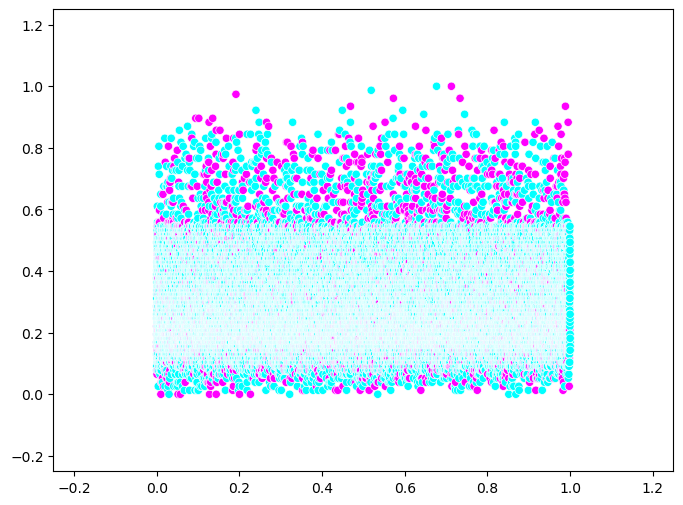

In [69]:
# Gráfico

plt.figure(figsize = (8, 6))

# Puntos de las primera 2 clases
sns.scatterplot(x = X[:, 0], y = X[:, 1], c = y, cmap = "cool")

# Recta
x_linspace = np.linspace(-0.25, 1.25, 100)
recta = (model.coef_[0][0]*x_linspace + model.intercept_[0])/(-model.coef_[0][1])

plt.plot(x_linspace, recta)

plt.xlim(-0.25, 1.25)
plt.ylim(-0.25, 1.25)

plt.show()

In [70]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_regression(coef_, intercept_, x):
    recta = np.dot(coef_, x) + intercept_
    
    return sigmoid(recta)

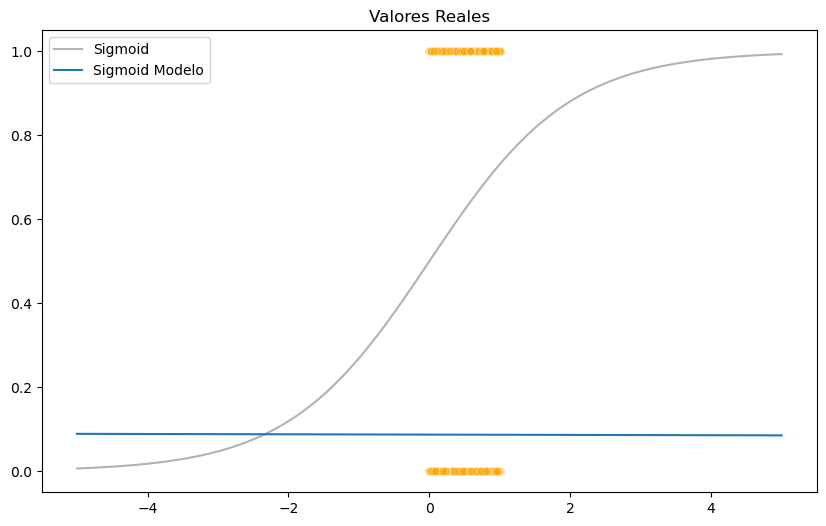

In [71]:
plt.figure(figsize = (10, 6))

x_linspace = np.linspace(-5, 5, 100)
curva_sigmoid = sigmoid_regression(model.coef_[0][0], model.intercept_[0], x_linspace)

# Curva Sigmoid Original
plt.plot(x_linspace, sigmoid(x_linspace), color = "black", alpha = 0.3, label = "Sigmoid")

# Curva Sigmoid de la regression
plt.plot(x_linspace, curva_sigmoid, label = "Sigmoid Modelo")

# Puntos de X_test & y_test
sns.scatterplot(x = X_test[:, 0], y = y_test, color = "orange", alpha = 0.5)

plt.title("Valores Reales")
plt.legend()
plt.show()

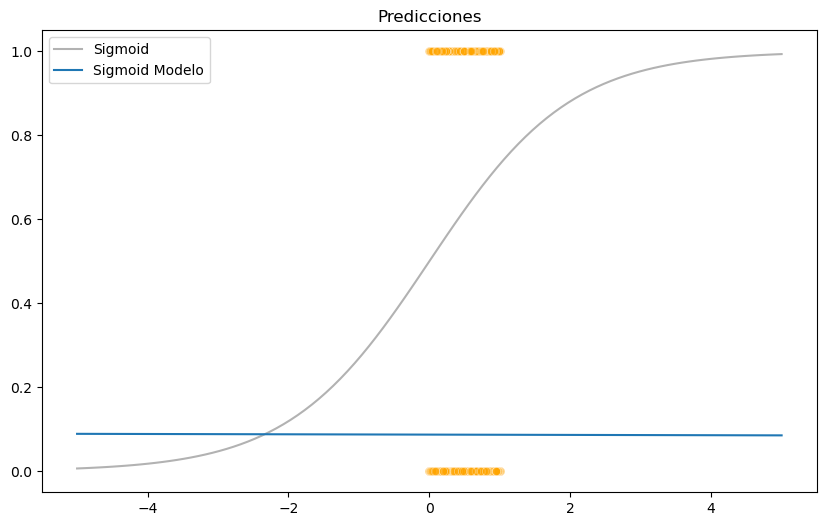

In [72]:
plt.figure(figsize = (10, 6))

x_linspace = np.linspace(-5, 5, 100)
curva_sigmoid = sigmoid_regression(model.coef_[0][0], model.intercept_[0], x_linspace)

# Curva Sigmoid Original
plt.plot(x_linspace, sigmoid(x_linspace), color = "black", alpha = 0.3, label = "Sigmoid")

# Curva Sigmoid de la regression
plt.plot(x_linspace, curva_sigmoid, label = "Sigmoid Modelo")

# Puntos de X_test & y_test
sns.scatterplot(x = X_test[:, 0], y = yhat, color = "orange", alpha = 0.5)

plt.title("Predicciones")
plt.legend()
plt.show()

## Decision tree

In [74]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [76]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.5781831510394093
Accuracy: 0.901860360021089
Precisión: 0.7803184945973323
Sensibilidad: 0.6397790877099875
F1-score: 0.6783090255783465


In [77]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[11521,   250],
       [ 1053,   453]], dtype=int64)

In [78]:
print(classification_report(y_test, yhat, digits = 3))

              precision    recall  f1-score   support

         0.0      0.916     0.979     0.946     11771
         1.0      0.644     0.301     0.410      1506

    accuracy                          0.902     13277
   macro avg      0.780     0.640     0.678     13277
weighted avg      0.885     0.902     0.886     13277



In [79]:
model.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [80]:
model.feature_importances_

array([0.09759858, 0.09418956, 0.03423061, 0.00076019, 0.09906784,
       0.02246494, 0.00729927, 0.27095165, 0.16668742, 0.0279687 ,
       0.04097493, 0.00907357, 0.00062944, 0.00370044, 0.00078402,
       0.00445274, 0.0062963 , 0.0018946 , 0.00105702, 0.08874277,
       0.00082213, 0.00175781, 0.00174801, 0.00535022, 0.00453223,
       0.00696501])

In [82]:
for col, imp in zip(df.feature_names, model.feature_importances_):
    print(f"Columna: {col} Importancia: {imp}")

AttributeError: 'DataFrame' object has no attribute 'feature_names'

In [83]:
from sklearn.tree import plot_tree

plt.figure(figsize = (100, 200))

plot_tree(model) 

plt.savefig("iris_decision_tree.jpg")

plt.show()

KeyboardInterrupt: 

In [84]:
print(f"criterion: {model.criterion}")
print(f"splitter: {model.splitter}")
print(f"max_depth: {model.max_depth}")
print(f"min_samples_split: {model.min_samples_split}")
print(f"min_samples_leaf: {model.min_samples_leaf}")
print(f"min_weight_fraction_leaf: {model.min_weight_fraction_leaf}")
print(f"max_features: {model.max_features}")
print(f"random_state: {model.random_state}")
print(f"max_leaf_nodes: {model.max_leaf_nodes}")
print(f"min_impurity_decrease: {model.min_impurity_decrease}")
print(f"class_weight: {model.class_weight}")
print(f"ccp_alpha: {model.ccp_alpha}")

criterion: gini
splitter: best
max_depth: None
min_samples_split: 2
min_samples_leaf: 1
min_weight_fraction_leaf: 0.0
max_features: None
random_state: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
class_weight: None
ccp_alpha: 0.0


In [ ]:
model.get_params()

## Random forest

In [88]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [89]:
yhat = model.predict(X_test)

yhat

array([0., 0., 0., ..., 0., 0., 0.])

In [90]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.6158088818649758
Accuracy: 0.9075845447013633
Precisión: 0.7890705487476313
Sensibilidad: 0.6855679820857594
F1-score: 0.7217908448305304


In [91]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[11450,   321],
       [  906,   600]], dtype=int64)

In [92]:
print(classification_report(y_test, yhat, digits = 3))

              precision    recall  f1-score   support

         0.0      0.927     0.973     0.949     11771
         1.0      0.651     0.398     0.494      1506

    accuracy                          0.908     13277
   macro avg      0.789     0.686     0.722     13277
weighted avg      0.895     0.908     0.898     13277



In [93]:
model.predict_proba(X_test)

array([[0.96, 0.04],
       [0.79, 0.21],
       [0.77, 0.23],
       ...,
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.83, 0.17]])

In [94]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## SVM

In [97]:
model = SVC(probability = True)
model.fit(X_train, y_train)

SVC(probability=True)

In [98]:
yhat = model.predict(X_test)

yhat

array([0., 0., 0., ..., 0., 0., 0.])

In [103]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.5337868171900526
Accuracy: 0.8961361753408149
Precisión: 0.7726771960410874
Sensibilidad: 0.5893577447353846
F1-score: 0.6200005583043571


In [100]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[11608,   163],
       [ 1216,   290]], dtype=int64)

In [101]:
model.predict_proba(X_test)

array([[0.90366476, 0.09633524],
       [0.89960766, 0.10039234],
       [0.89487036, 0.10512964],
       ...,
       [0.90604514, 0.09395486],
       [0.90470662, 0.09529338],
       [0.9022691 , 0.0977309 ]])

In [102]:
model.support_vectors_

array([[0.38660038, 0.03896104, 0.72727273, ..., 0.        , 1.        ,
        0.        ],
       [0.89368433, 0.16883117, 0.09090909, ..., 0.        , 1.        ,
        0.        ],
       [0.18989945, 0.11688312, 0.09090909, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.92848266, 0.18181818, 0.36363636, ..., 0.        , 0.        ,
        1.        ],
       [0.49626031, 0.75324675, 0.27272727, ..., 1.        , 0.        ,
        0.        ],
       [0.25497684, 0.05194805, 0.81818182, ..., 0.        , 1.        ,
        0.        ]])

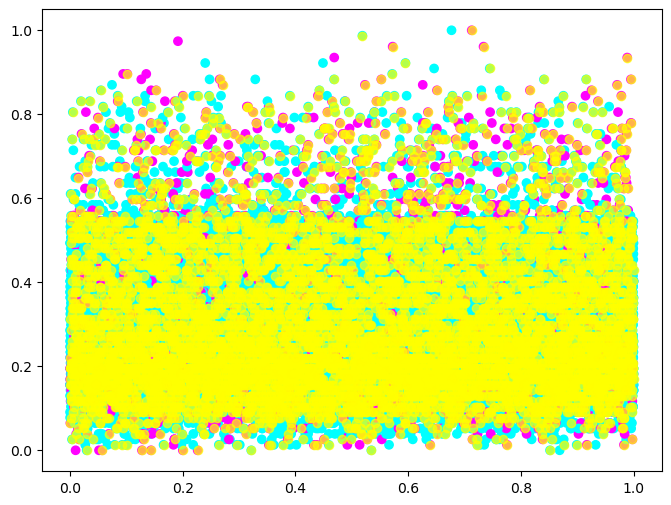

In [104]:
plt.figure(figsize = (8, 6))

# Puntos de entrenamiento (Train)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = "cool")

# Puntos de prueba (Test)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = "cool")

# Vecores de Soporte (SVM)
vectores_soporte = model.support_vectors_

plt.plot(vectores_soporte[:, 0], vectores_soporte[:, 1], color = "yellow", marker = "o", linestyle = "", alpha = 0.7)

plt.show()

## Adaboost

In [107]:
model = AdaBoostClassifier(n_estimators = 50)
model.fit(X_train, y_train)

AdaBoostClassifier()

In [108]:
yhat = model.predict(X_test)

yhat

array([0., 0., 0., ..., 0., 0., 0.])

In [109]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.6101013445688261
Accuracy: 0.9059275438728629
Precisión: 0.7832472558072815
Sensibilidad: 0.6800010334444512
F1-score: 0.7157487044415765


In [110]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[11444,   327],
       [  922,   584]], dtype=int64)

In [111]:
np.round(model.predict_proba(X_test), 4)

array([[0.5231, 0.4769],
       [0.5137, 0.4863],
       [0.5002, 0.4998],
       ...,
       [0.5311, 0.4689],
       [0.5166, 0.4834],
       [0.5146, 0.4854]])

In [112]:
model.base_estimator_

DecisionTreeClassifier(max_depth=1)

In [113]:
model.base_estimator_

DecisionTreeClassifier(max_depth=1)

In [114]:
np.round(model.estimator_errors_, 3)

array([0.119, 0.37 , 0.373, 0.411, 0.395, 0.433, 0.445, 0.456, 0.462,
       0.448, 0.464, 0.456, 0.481, 0.44 , 0.483, 0.469, 0.463, 0.451,
       0.469, 0.479, 0.461, 0.477, 0.459, 0.472, 0.493, 0.486, 0.49 ,
       0.478, 0.486, 0.484, 0.483, 0.48 , 0.472, 0.467, 0.474, 0.481,
       0.497, 0.487, 0.484, 0.495, 0.486, 0.489, 0.478, 0.474, 0.478,
       0.487, 0.479, 0.492, 0.481, 0.477])

In [115]:
model.feature_importances_

array([0.02, 0.06, 0.02, 0.  , 0.02, 0.02, 0.02, 0.24, 0.38, 0.04, 0.04,
       0.  , 0.  , 0.02, 0.  , 0.  , 0.02, 0.  , 0.  , 0.04, 0.  , 0.02,
       0.  , 0.02, 0.  , 0.02])

In [116]:
model.decision_function(X_test)

array([-0.09248008, -0.05462196, -0.0009977 , ..., -0.12459801,
       -0.0663813 , -0.05821768])

## Gradien boost

In [122]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [123]:
yhat = model.predict(X_test)

yhat

array([0., 0., 0., ..., 0., 0., 0.])

In [124]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.6303657578319859
Accuracy: 0.9118023649920916
Precisión: 0.8035124346347181
Sensibilidad: 0.6995278309636881
F1-score: 0.7368263290959598


In [125]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[11466,   305],
       [  866,   640]], dtype=int64)

In [126]:
model.feature_importances_

array([2.37602894e-03, 4.36789821e-02, 1.45442833e-03, 0.00000000e+00,
       9.54119232e-03, 4.52548105e-02, 2.25623920e-03, 4.59095450e-01,
       1.54409689e-01, 4.93454885e-03, 3.71357140e-02, 2.09329124e-03,
       8.68931203e-04, 1.38394141e-02, 2.66929732e-04, 1.91860309e-03,
       2.81582322e-02, 0.00000000e+00, 1.42265538e-03, 1.85622850e-01,
       1.53673134e-03, 2.96085128e-04, 2.06778846e-04, 8.67633872e-04,
       0.00000000e+00, 2.76478087e-03])

In [127]:
np.round(model.predict_proba(X_test), 3)

array([[0.986, 0.014],
       [0.827, 0.173],
       [0.614, 0.386],
       ...,
       [0.993, 0.007],
       [0.958, 0.042],
       [0.905, 0.095]])

In [128]:
model.estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x203B9926C40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x203B9926C40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x203B9926C40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x203B9926C40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x203B9926C40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x203B9926C40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
             

In [129]:
for x in model.staged_predict(X_test):
    print(x)

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0.

In [130]:
for x in model.staged_predict_proba(X_test):
    print(x)

[[0.88782891 0.11217109]
 [0.88782891 0.11217109]
 [0.86407161 0.13592839]
 ...
 [0.88782891 0.11217109]
 [0.88782891 0.11217109]
 [0.88782891 0.11217109]]
[[0.89596264 0.10403736]
 [0.89596264 0.10403736]
 [0.84460104 0.15539896]
 ...
 [0.89596264 0.10403736]
 [0.88758347 0.11241653]
 [0.88758347 0.11241653]]
[[0.90138269 0.09861731]
 [0.90138269 0.09861731]
 [0.83302097 0.16697903]
 ...
 [0.90138269 0.09861731]
 [0.89338811 0.10661189]
 [0.89338811 0.10661189]]
[[0.9024138  0.0975862 ]
 [0.90873987 0.09126013]
 [0.82282456 0.17717544]
 ...
 [0.90873987 0.09126013]
 [0.90127638 0.09872362]
 [0.89449302 0.10550698]]
[[0.90858688 0.09141312]
 [0.90701472 0.09298528]
 [0.8065853  0.1934147 ]
 ...
 [0.91455067 0.08544933]
 [0.90751404 0.09248596]
 [0.88389574 0.11610426]]
[[0.91320748 0.08679252]
 [0.91170707 0.08829293]
 [0.79195471 0.20804529]
 ...
 [0.91889673 0.08110327]
 [0.91218363 0.08781637]
 [0.88961276 0.11038724]]
[[0.91863747 0.08136253]
 [0.91024008 0.08975992]
 [0.77761624 0

In [132]:
model = GradientBoostingClassifier(n_estimators = 5000,
                                   learning_rate = 0.05,
                                   max_depth = 3,
                                   subsample = 0.5,
                                   validation_fraction = 0.1,
                                   n_iter_no_change = 20,
                                   max_features = "log2",
                                   verbose = 1)
model.fit(X_train, y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.7260           0.0055           42.00s
         2           0.7105           0.0081           38.74s
         3           0.6928           0.0066           38.52s
         4           0.6915           0.0038           36.40s
         5           0.7021           0.0137           35.10s
         6           0.6781           0.0130           36.74s
         7           0.6667           0.0033           35.77s
         8           0.6575           0.0143           35.66s
         9           0.6590           0.0064           34.52s
        10           0.6432           0.0053           34.04s
        20           0.5928           0.0078           32.88s
        30           0.5665           0.0014           32.64s
        40           0.5449           0.0009           33.07s
        50           0.5224           0.0018           32.82s
        60           0.5042           0.0023           32.72s
       

GradientBoostingClassifier(learning_rate=0.05, max_features='log2',
                           n_estimators=5000, n_iter_no_change=20,
                           subsample=0.5, verbose=1)

In [133]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"AUC Train: {roc_auc_score(y_train, y_train_pred)}\nAUC Test: {roc_auc_score(y_test, y_test_pred)}")

AUC Train: 0.7094526390874529
AUC Test: 0.6982266612196473


In [134]:
yhat = model.predict(X_test)

yhat

array([0., 0., 0., ..., 0., 0., 0.])

In [135]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.6277014061467803
Accuracy: 0.9105219552609777
Precisión: 0.7977552539053596
Sensibilidad: 0.6982266612196473
F1-score: 0.734271037181996
